# Problem Definition

**Tags:** `statistics`, `probability theory`, `decision theory`, `expected value`, `optimization`, `dice`, `stochastic processes`

Consider a standard fair six-sided die with outcomes `{1, 2, 3, 4, 5, 6}`. You are allowed **at most two rolls**. After the first roll, you may either **accept the outcome** or **reroll once** and accept the second outcome. The objective is to determine a strategy that **maximizes the expected value** of the result obtained.

## Formal Description

1. Let `X₁` be the result of the first roll.
2. Let `X₂` be the result of the second roll (if chosen).
3. Define a decision rule `f(X₁) ∈ {accept, reroll}`.
4. The goal is to choose `f` to maximize `E[final outcome]`.

### Reasoning

Since we are dealing with a fair six-sided die, each outcome is equally likely with probability $$ 1/6 $$

Therefore, the expected value is

$$
E(X) \;=\; \frac{1}{6}\cdot1 + \frac{1}{6}\cdot2 + \frac{1}{6}\cdot3 + \frac{1}{6}\cdot4 + \frac{1}{6}\cdot5 + \frac{1}{6}\cdot6
\;=\; \frac{1}{6}(1+2+3+4+5+6)
\;=\; \frac{21}{6} \;=\; 3.5
$$


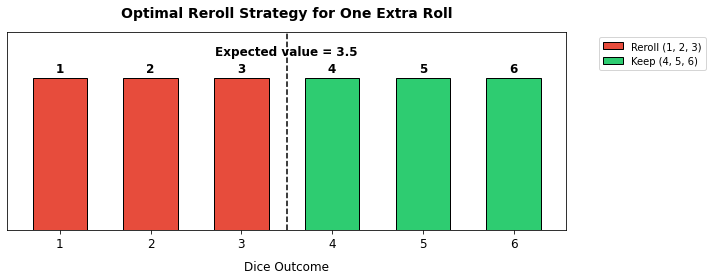

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# values on the die
values = [1, 2, 3, 4, 5, 6]

# colors: red for reroll, green for keep
colors = ['#e74c3c' if v < 3.5 else '#2ecc71' for v in values]

plt.figure(figsize=(10, 4))
bars = plt.bar(values, [1]*6, color=colors, edgecolor='black', width=0.6)

# add value labels on top of bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, 1.02, str(val),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# add vertical line for expected value
plt.axvline(3.5, color='black', linestyle='--', linewidth=1.5)
plt.text(3.5, 1.15, 'Expected value = 3.5', ha='center', fontsize=12, fontweight='bold')

# styling
plt.xticks(values, fontsize=12)
plt.yticks([])
plt.ylim(0, 1.3)
plt.title("Optimal Reroll Strategy for One Extra Roll", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Dice Outcome", fontsize=12, labelpad=10)

# custom legend (placed outside the chart)
legend_elements = [
    Patch(facecolor='#e74c3c', edgecolor='black', label='Reroll (1, 2, 3)'),
    Patch(facecolor='#2ecc71', edgecolor='black', label='Keep (4, 5, 6)')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=10, frameon=True)

plt.tight_layout()
plt.show()


Even based on common sense, we can guess the following strategy:  

- If the first roll gives **1, 2, or 3**, we should roll the die again (use the two-roll strategy).  
- If the first roll gives **4, 5, or 6**, we should keep the result and avoid the second roll.

But why is this the case?

- 3.5 is greater than 1,2,3 and lower than 4,5,6
- to calculate the expected value of the stategy we should divide into 2 parts: when we see outcomes 1,2,3 and when we see 4,5,6

### 3. Calculate Expected Value Using This Strategy

Let’s verify that this strategy actually works:

**Case 1: First roll 1, 2, 3 → reroll**  
Expected value:  
$$
E_{\text{low}} = 3.5 \quad \text{(from the reroll)}
$$

**Case 2: First roll 4, 5, 6 → keep**  
Expected value:  
$$
E_{\text{high}} = \frac{4 + 5 + 6}{3} = 5
$$

**Overall expected value of the strategy:**  
$$
EV = P(\text{low}) \cdot E_{\text{low}} + P(\text{high}) \cdot E_{\text{high}}
$$

$$
EV = \frac{3}{6} \cdot 3.5 + \frac{3}{6} \cdot 5
= 0.5 \cdot 3.5 + 0.5 \cdot 5
= 1.75 + 2.5
= 4.25
$$

✅ So the expected outcome using this strategy is **4.25**, which is higher than the expected value of a single roll (3.5).

**Note on the uplift:**  
The increase from 3.5 to 4.25 happened because we replaced outcomes 1, 2, 3 with the expected value of a reroll (3.5). This adjustment improves the overall expected value.

**Visualization. The following bar chart compares the expected value if we always accept the first roll versus applying the optimal strategy**

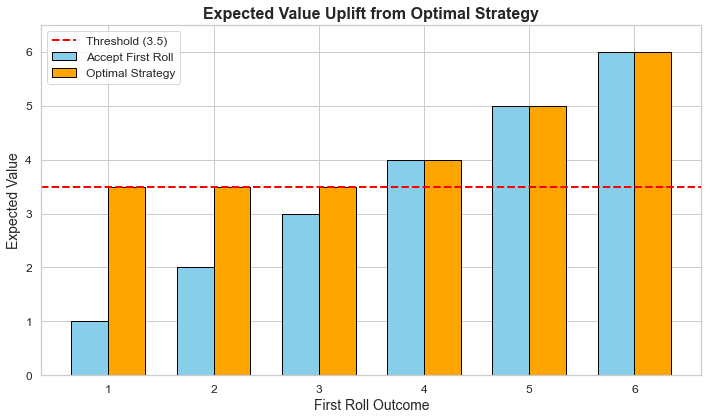

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


# Use Seaborn style for aesthetics
sns.set(style='whitegrid', palette='pastel')

# Outcomes of the die
outcomes = [1, 2, 3, 4, 5, 6]

# Expected value if we accept the first roll
accept_first = outcomes

# Expected value if we apply the strategy (reroll below 3.5, keep above)
strategy = [3.5 if x <= 3 else x for x in outcomes]

# Plotting
plt.figure(figsize=(10,6))
bar_width = 0.35
indices = range(len(outcomes))

# Bars with slight offset for clarity
plt.bar([i - bar_width/2 for i in indices], accept_first, width=bar_width, color='skyblue', edgecolor='black', label='Accept First Roll')
plt.bar([i + bar_width/2 for i in indices], strategy, width=bar_width, color='orange', edgecolor='black', label='Optimal Strategy')

# Highlight threshold
plt.axhline(y=3.5, color='red', linestyle='--', linewidth=2, label='Threshold (3.5)')

# Labels, title, and ticks
plt.title('Expected Value Uplift from Optimal Strategy', fontsize=16, fontweight='bold')
plt.xlabel('First Roll Outcome', fontsize=14)
plt.ylabel('Expected Value', fontsize=14)
plt.xticks(indices, [str(x) for x in outcomes], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 6.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


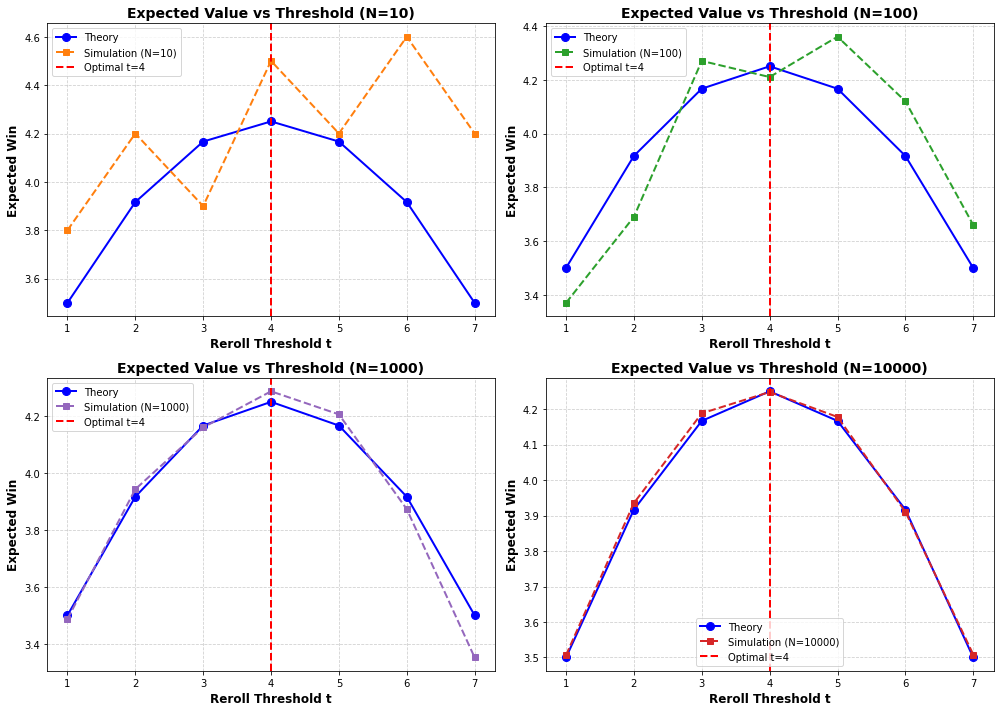

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Fix random seed for reproducibility

faces = np.arange(1, 7)
mean_roll = np.mean(faces)

# Function to simulate the dice game
def simulate_game(t, trials):
    results = []
    for _ in range(trials):
        first = np.random.randint(1, 7)
        if first < t:
            second = np.random.randint(1, 7)
            results.append(second)
        else:
            results.append(first)
    return np.mean(results)

# Function to calculate theoretical expected value
def expected_value(t):
    low_part = (t - 1) * mean_roll if t > 1 else 0
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / 6

thresholds = np.arange(1, 8)
theoretical_E = [expected_value(t) for t in thresholds]

trial_counts = [10, 100, 1000, 10000]
opt_t = thresholds[np.argmax(theoretical_E)]

# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten axes for easy iteration

# Colors for simulation lines
sim_colors = ['#FF7F0E', '#2CA02C', '#9467BD', '#D62728']

for ax, N, color in zip(axes, trial_counts, sim_colors):
    simulated_E = [simulate_game(t, N) for t in thresholds]
    
    # Plot theoretical line
    ax.plot(thresholds, theoretical_E, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Theory')
    
    # Plot simulation line
    ax.plot(thresholds, simulated_E, marker='s', linestyle='--', linewidth=2, markersize=6, color=color, label=f'Simulation (N={N})')
    
    # Plot optimal threshold
    ax.axvline(opt_t, color='red', linestyle='--', linewidth=2, label=f'Optimal t={opt_t}')
    
    # Customize axes
    ax.set_title(f'Expected Value vs Threshold (N={N})', fontsize=14, fontweight='bold')
    ax.set_xlabel('Reroll Threshold t', fontsize=12, fontweight='bold')
    ax.set_ylabel('Expected Win', fontsize=12, fontweight='bold')
    ax.set_xticks(thresholds)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()
